In [11]:
!pip install pydub
!apt-get install ffmpeg
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the speech commands dataset
dataset, info = tfds.load('speech_commands', with_info=True, as_supervised=True)
train_data, test_data = dataset['train'], dataset['test']

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [12]:
print(info)

tfds.core.DatasetInfo(
    name='speech_commands',
    full_name='speech_commands/0.0.3',
    description="""
    An audio dataset of spoken words designed to help train and evaluate keyword
    spotting systems. Its primary goal is to provide a way to build and test small
    models that detect when a single word is spoken, from a set of ten target words,
    with as few false positives as possible from background noise or unrelated
    speech. Note that in the train and validation set, the label "unknown" is much
    more prevalent than the labels of the target words or background noise. One
    difference from the release version is the handling of silent segments. While in
    the test set the silence segments are regular 1 second files, in the training
    they are provided as long segments under "background_noise" folder. Here we
    split these background noise into 1 second clips, and also keep one of the files
    for the validation set.
    """,
    homepage='https://arxiv.or

In [13]:
# Explore dataset info
print(info)

# Check the shape of the data
for audio, label in train_data.take(1):
    print(f"Audio shape: {audio.shape}, Label: {label.numpy()}")


tfds.core.DatasetInfo(
    name='speech_commands',
    full_name='speech_commands/0.0.3',
    description="""
    An audio dataset of spoken words designed to help train and evaluate keyword
    spotting systems. Its primary goal is to provide a way to build and test small
    models that detect when a single word is spoken, from a set of ten target words,
    with as few false positives as possible from background noise or unrelated
    speech. Note that in the train and validation set, the label "unknown" is much
    more prevalent than the labels of the target words or background noise. One
    difference from the release version is the handling of silent segments. While in
    the test set the silence segments are regular 1 second files, in the training
    they are provided as long segments under "background_noise" folder. Here we
    split these background noise into 1 second clips, and also keep one of the files
    for the validation set.
    """,
    homepage='https://arxiv.or

In [14]:
# Import necessary libraries
import numpy as np

# Get the unique labels from the training dataset
label_names = np.unique([label.numpy() for _, label in train_data])
print("Labels in the dataset:", label_names)


Labels in the dataset: [ 0  1  2  3  4  5  6  7  8  9 10 11]


In [15]:
# Apply tf.squeeze to drop extra axes in the audio data
for audio, label in train_data.take(1):
    # Squeeze the audio data
    squeezed_audio = tf.squeeze(audio)
    print(f"Squeezed audio shape: {squeezed_audio.shape}, Label: {label.numpy()}")


Squeezed audio shape: (16000,), Label: 4


In [16]:
import tensorflow as tf
import tensorflow_datasets as tfds
import IPython.display as display

# Load the speech commands dataset
dataset, info = tfds.load('speech_commands', with_info=True, as_supervised=True)
train_data, test_data = dataset['train'], dataset['test']

# Get a sample audio and label from the training set
audio, label = next(iter(train_data))

# Display the audio sample
display.display(display.Audio(audio, rate=16000))


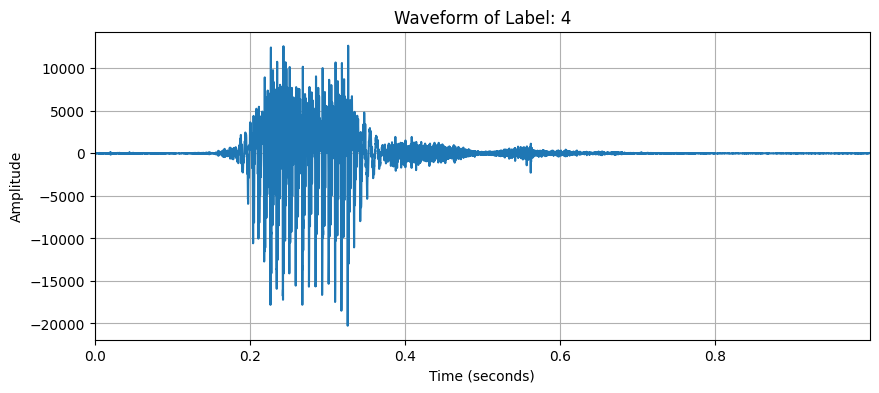

In [18]:
import matplotlib.pyplot as plt

# Take a sample from the dataset
for audio, label in train_data.take(1):
    # Squeeze the audio data
    squeezed_audio = tf.squeeze(audio)

    # Convert the audio tensor to a NumPy array for visualization
    audio_data = squeezed_audio.numpy()

    # Create a time array for the x-axis
    time = np.arange(audio_data.shape[0]) / 16000  # Assuming a sample rate of 16 kHz

    # Plot the waveform
    plt.figure(figsize=(10, 4))
    plt.plot(time, audio_data)
    plt.title(f'Waveform of Label: {label.numpy()}')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.xlim(0, time[-1])  # Set x-axis limit to the duration of the audio
    plt.grid()
    plt.show()


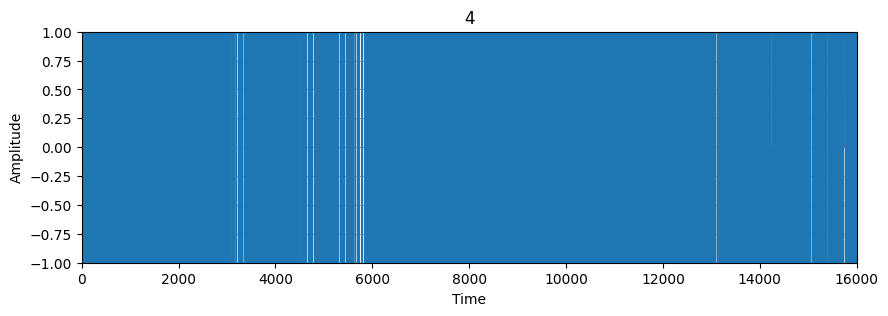

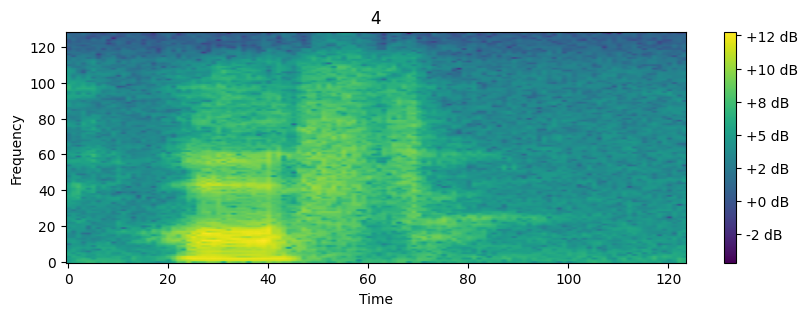

In [19]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as display

# Load the speech commands dataset
dataset, info = tfds.load('speech_commands', with_info=True, as_supervised=True)
train_data, test_data = dataset['train'], dataset['test']

# Get the unique labels
label_names = np.unique([label.numpy() for _, label in train_data])

# Define functions to plot waveform and spectrogram
def plot_wave(waveform, label):
    plt.figure(figsize=(10, 3))
    plt.title(label)
    plt.plot(waveform)
    plt.xlim([0, 16000])  # Limit x-axis to the duration of audio
    plt.ylim([-1, 1])  # Amplitude range
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.grid(True)

def get_spectrogram(waveform):
    # Ensure the waveform is in float32 format
    waveform = tf.cast(waveform, tf.float32)
    spectrogram = tf.signal.stft(waveform, frame_length=255, frame_step=128)
    spectrogram = tf.abs(spectrogram)
    return spectrogram[..., tf.newaxis]

def plot_spectrogram(spectrogram, label):
    spectrogram = np.squeeze(spectrogram, axis=-1)
    log_spec = np.log(spectrogram.T + np.finfo(float).eps)
    plt.figure(figsize=(10, 3))
    plt.title(label)
    plt.imshow(log_spec, aspect='auto', origin='lower')
    plt.colorbar(format='%+2.0f dB')
    plt.xlabel('Time')
    plt.ylabel('Frequency')

# Plotting the waveform and the spectrogram of a random sample
audio, label = next(iter(train_data))

# Plot the waveform with its label name
plot_wave(audio.numpy(), label_names[label.numpy()])

# Plot the spectrogram with its label name
plot_spectrogram(get_spectrogram(audio), label_names[label.numpy()])
plt.show()


In [20]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the speech commands dataset
dataset, info = tfds.load('speech_commands', with_info=True, as_supervised=True)
train_data, validation_data = dataset['train'], dataset['validation']

# Define the function to create spectrograms from audio data
def get_spectrogram(waveform):
    waveform = tf.cast(waveform, tf.float32)  # Ensure float32 format
    spectrogram = tf.signal.stft(waveform, frame_length=255, frame_step=128)
    spectrogram = tf.abs(spectrogram)
    return spectrogram[..., tf.newaxis]  # Add a new axis for the channel

# Create spectrogram dataset from the waveform or audio data
def get_spectrogram_dataset(dataset):
    dataset = dataset.map(
        lambda x, y: (get_spectrogram(x), y),
        num_parallel_calls=tf.data.AUTOTUNE
    )
    return dataset

# Apply the function on the training and validation datasets
train_set = get_spectrogram_dataset(train_data)
validation_set = get_spectrogram_dataset(validation_data)

# Split validation set into two equal parts
val_set = validation_set.take(validation_set.cardinality() // 2)
test_set = validation_set.skip(validation_set.cardinality() // 2)

# Print the sizes of the datasets
print(f"Train set size: {train_set.cardinality().numpy()}")
print(f"Validation set size: {val_set.cardinality().numpy()}")
print(f"Test set size: {test_set.cardinality().numpy()}")


Train set size: 85511
Validation set size: 5051
Test set size: 5051


In [21]:
# Check the dimensions of the input datasets
train_set_shape = train_set.element_spec[0].shape
val_set_shape = val_set.element_spec[0].shape
test_set_shape = test_set.element_spec[0].shape

print("Train set shape:", train_set_shape)
print("Validation set shape:", val_set_shape)
print("Testing set shape:", test_set_shape)


Train set shape: (None, 129, 1)
Validation set shape: (None, 129, 1)
Testing set shape: (None, 129, 1)


In [22]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the speech commands dataset
dataset, info = tfds.load('speech_commands', with_info=True, as_supervised=True)
train_data, validation_data = dataset['train'], dataset['validation']

# Define the function to create spectrograms from audio data
def get_spectrogram(waveform):
    waveform = tf.cast(waveform, tf.float32)  # Ensure float32 format
    spectrogram = tf.signal.stft(waveform, frame_length=255, frame_step=128)
    spectrogram = tf.abs(spectrogram)
    return spectrogram[..., tf.newaxis]  # Add a new axis for the channel

# Create spectrogram dataset from the waveform or audio data
def get_spectrogram_dataset(dataset):
    dataset = dataset.map(
        lambda x, y: (get_spectrogram(x), y),
        num_parallel_calls=tf.data.AUTOTUNE
    )
    return dataset

# Apply the function on the training and validation datasets
train_set = get_spectrogram_dataset(train_data)
validation_set = get_spectrogram_dataset(validation_data)

# Splitting validation set into two equal parts
val_set = validation_set.take(validation_set.cardinality() // 2)
test_set = validation_set.skip(validation_set.cardinality() // 2)

# Build the model
def get_model(input_shape, num_labels):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        # Resizing the input to a square image of size 64 x 64 and normalizing it
        tf.keras.layers.Resizing(64, 64),
        tf.keras.layers.Normalization(),

        # Convolution layers followed by MaxPooling layer
        tf.keras.layers.Conv2D(64, 3, activation='relu'),
        tf.keras.layers.Conv2D(128, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Flatten(),

        # Dense layer
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),

        # Softmax layer to get the label prediction
        tf.keras.layers.Dense(num_labels, activation='softmax')
    ])

    # Printing model summary
    model.summary()
    return model

# Getting input shape from the sample audio and number of classes
input_shape = (64, 64, 1)  # Set this explicitly to include the channels dimension

num_labels = len(info.features['label'].names)  # Get number of unique labels

# Creating a model
model = get_model(input_shape, num_labels)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing (Resizing)                  │ (None, 64, 64, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ normalization (Normalization)        │ (None, 64, 64, 1)           │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 62, 62, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      29,491,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │           3,084 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,569,039 (112.80 MB)

 Trainable params: 29,569,036 (112.80 MB)

 Non-trainable params: 3 (16.00 B)

In [31]:
import tensorflow_datasets as tfds

# Load the speech commands dataset with info
dataset, info = tfds.load('speech_commands', with_info=True, as_supervised=True)

# Get all label names from the dataset info
label_names = info.features['label'].names

# Print all available labels
print("Available labels:", label_names)


Available labels: ['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes', '_silence_', '_unknown_']


In [34]:
# Get the mapping of commands to label indices
label_map = {label: idx for idx, label in enumerate(label_names)}

# List of commands to filter
commands = ['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes', '_silence_', '_unknown_']

# Get the corresponding numeric label values for the commands
command_labels = [label_map[cmd] for cmd in commands if cmd in label_map]

# Filter the dataset for specific commands based on the label values
filtered_train_set = train_set.filter(lambda x, y: tf.reduce_any([tf.equal(y, lbl) for lbl in command_labels]))
filtered_val_set = val_set.filter(lambda x, y: tf.reduce_any([tf.equal(y, lbl) for lbl in command_labels]))

# Check the filtered datasets
print(filtered_train_set)
print(filtered_val_set)

# Check the number of samples per command
def count_samples_per_class(dataset):
    label_count = {cmd: 0 for cmd in commands}
    for _, label in dataset:
        cmd = label_names[label.numpy()]
        if cmd in label_count:
            label_count[cmd] += 1
    return label_count

# Count samples in the training set
train_samples_count = count_samples_per_class(filtered_train_set)
val_samples_count = count_samples_per_class(filtered_val_set)

print("Training Set Command Distribution:", train_samples_count)
print("Validation Set Command Distribution:", val_samples_count)


<_FilterDataset element_spec=(TensorSpec(shape=(None, 129, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<_FilterDataset element_spec=(TensorSpec(shape=(None, 129, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
Training Set Command Distribution: {'down': 3134, 'go': 3106, 'left': 3037, 'no': 3130, 'off': 2970, 'on': 3086, 'right': 3019, 'stop': 3111, 'up': 2948, 'yes': 3228, '_silence_': 668, '_unknown_': 54074}
Validation Set Command Distribution: {'down': 187, 'go': 177, 'left': 180, 'no': 209, 'off': 181, 'on': 170, 'right': 189, 'stop': 182, 'up': 177, 'yes': 201, '_silence_': 51, '_unknown_': 3147}


In [40]:
import tensorflow as tf
import tensorflow_datasets as tfds
import random

# Load the speech commands dataset
dataset, info = tfds.load('speech_commands', with_info=True, as_supervised=True)
train_data, test_data = dataset['train'], dataset['test']

# Get label names
label_names = ['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes', '_silence_', '_unknown_']

# Specify the number of samples to keep for each label (adjust as needed)
samples_per_label = {
    'down': 1000, 'go': 1000, 'left': 1000, 'no': 1000, 'off': 1000,
    'on': 1000, 'right': 1000, 'stop': 1000, 'up': 1000, 'yes': 1000,
    '_silence_': 200, '_unknown_': 2000  # Reduce these to downsize
}

# Function to filter and downsize the dataset
def downsize_dataset(dataset, samples_per_label, label_names):
    def filter_and_cast(x, y):
        y = tf.cast(y, tf.int16)  # Ensure labels are int16
        return x, y

    # Apply the casting function
    dataset = dataset.map(filter_and_cast)

    # Create a mapping of label names to indices
    label_to_index = {label: index for index, label in enumerate(label_names)}

    # Downsize by taking the required samples per label
    downsized_datasets = [
        dataset.filter(lambda x, y: tf.equal(y, label_to_index[label])).take(samples)
        for label, samples in samples_per_label.items()
    ]

    downsized_dataset = tf.data.experimental.sample_from_datasets(downsized_datasets)

    return downsized_dataset

# Downsize the training and validation sets
downsized_train_set = downsize_dataset(train_data, samples_per_label, label_names)
downsized_val_set = downsize_dataset(test_data, samples_per_label, label_names)

# Verify the downsized dataset distribution using cardinality
train_set_size = tf.data.experimental.cardinality(downsized_train_set).numpy()
val_set_size = tf.data.experimental.cardinality(downsized_val_set).numpy()

print("Training set downsized:", train_set_size)
print("Validation set downsized:", val_set_size)


Training set downsized: -2
Validation set downsized: -2


In [96]:
import tensorflow as tf
import tensorflow_datasets as tfds
import random

# Load the speech commands dataset
dataset, info = tfds.load('speech_commands', with_info=True, as_supervised=True)
train_data, test_data = dataset['train'], dataset['test']

# Get label names
label_names = ['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes', '_silence_', '_unknown_']

# Specify the number of samples to keep for each label (adjust as needed)
samples_per_label = {
    'down': 1000, 'go': 1000, 'left': 1000, 'no': 1000, 'off': 1000,
    'on': 1000, 'right': 1000, 'stop': 1000, 'up': 1000, 'yes': 1000,
    '_silence_': 200, '_unknown_': 2000  # Reduce these to downsize
}

# Function to filter and downsize the dataset
def downsize_dataset(dataset, samples_per_label, label_names):
    def filter_and_cast(x, y):
        y = tf.cast(y, tf.int16)  # Ensure labels are int16
        return x, y

    # Apply the casting function
    dataset = dataset.map(filter_and_cast)

    # Create a mapping of label names to indices
    label_to_index = {label: index for index, label in enumerate(label_names)}

    # Downsize by taking the required samples per label
    downsized_datasets = [
        dataset.filter(lambda x, y: tf.equal(y, label_to_index[label])).take(samples)
        for label, samples in samples_per_label.items()
    ]

    downsized_dataset = tf.data.experimental.sample_from_datasets(downsized_datasets)

    # Ensure label shape is consistent with original dataset
    downsized_dataset = downsized_dataset.map(lambda x, y: (x, y))  # Keep y as is

    return downsized_dataset


# Downsize the training and validation sets
downsized_train_set = downsize_dataset(train_data, samples_per_label, label_names)
downsized_val_set = downsize_dataset(test_data, samples_per_label, label_names)

# Verify the downsized dataset distribution using cardinality
train_set_size = tf.data.experimental.cardinality(downsized_train_set).numpy()
val_set_size = tf.data.experimental.cardinality(downsized_val_set).numpy()

print("Training set downsized:", train_set_size)
print("Validation set downsized:", val_set_size)


Training set downsized: -2
Validation set downsized: -2


In [41]:
def count_samples(dataset, label_names):
    counts = {label: 0 for label in label_names}

    for _, y in dataset:
        label = label_names[y.numpy()]  # Convert the label tensor to a string
        counts[label] += 1

    return counts

# Count samples in the downsized datasets
train_counts = count_samples(downsized_train_set, label_names)
val_counts = count_samples(downsized_val_set, label_names)

print("Training set distribution:", train_counts)
print("Validation set distribution:", val_counts)


Training set distribution: {'down': 1000, 'go': 1000, 'left': 1000, 'no': 1000, 'off': 1000, 'on': 1000, 'right': 1000, 'stop': 1000, 'up': 1000, 'yes': 1000, '_silence_': 200, '_unknown_': 2000}
Validation set distribution: {'down': 406, 'go': 402, 'left': 412, 'no': 405, 'off': 402, 'on': 396, 'right': 396, 'stop': 411, 'up': 425, 'yes': 419, '_silence_': 200, '_unknown_': 408}


In [97]:
# Check the shape of labels in the original train set
for audio, label in train_data.take(5):  # Inspecting the first 5 samples
    print("Original Audio shape:", audio.shape)
    print("Original Label shape:", label.shape)

# Check the shape of labels in the downsized train set
for audio, label in downsized_train_set.take(5):  # Inspecting the first 5 samples
    print("Downsized Audio shape:", audio.shape)
    print("Downsized Label shape:", label.shape)


Original Audio shape: (16000,)
Original Label shape: ()
Original Audio shape: (16000,)
Original Label shape: ()
Original Audio shape: (16000,)
Original Label shape: ()
Original Audio shape: (16000,)
Original Label shape: ()
Original Audio shape: (16000,)
Original Label shape: ()
Downsized Audio shape: (16000,)
Downsized Label shape: ()
Downsized Audio shape: (16000,)
Downsized Label shape: ()
Downsized Audio shape: (12632,)
Downsized Label shape: ()
Downsized Audio shape: (16000,)
Downsized Label shape: ()
Downsized Audio shape: (12456,)
Downsized Label shape: ()


In [104]:
# Creating spectrogram dataset from waveform or audio data
def get_spectrogram_dataset(dataset):
    dataset = dataset.map(
        lambda x, y: (get_spectrogram(x), y),
        num_parallel_calls=tf.data.AUTOTUNE)
    return dataset

# Applying the function on the audio dataset
train_set = get_spectrogram_dataset(downsized_train_set)
validation_set = get_spectrogram_dataset(downsized_val_set)

# Dividing validation set into two equal val and test set
val_set = validation_set.take(validation_set.cardinality() // 2)
test_set = validation_set.skip(validation_set.cardinality() // 2)

# Check some outputs
print("Train set size:", tf.data.experimental.cardinality(train_set).numpy())
print("Validation set size:", tf.data.experimental.cardinality(val_set).numpy())
print("Test set size:", tf.data.experimental.cardinality(test_set).numpy())

# Verify the shapes of an example batch from the training set
for spectrogram, label in train_set.take(1):
    print("Spectrogram shape:", spectrogram.shape)
    print("Label shape:", label.shape)

# Similarly, you can check for val_set and test_set
for spectrogram, label in val_set.take(1):
    print("Validation Spectrogram shape:", spectrogram.shape)
    print("Validation Label shape:", label.shape)

for spectrogram, label in test_set.take(1):
    print("Test Spectrogram shape:", spectrogram.shape)
    print("Test Label shape:", label.shape)


Train set size: -2
Validation set size: -2
Test set size: -2
Spectrogram shape: (124, 129, 1)
Label shape: ()
Validation Spectrogram shape: (124, 129, 1)
Validation Label shape: ()


In [112]:
# Defining the model
def get_model(input_shape, num_labels):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.Resizing(64, 64),  # Resize to 64x64 for consistency
        tf.keras.layers.Normalization(),

        # Convolution layers followed by MaxPooling layer
        tf.keras.layers.Conv2D(64, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(128, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Flatten(),

        # Dense layer
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),

        # Softmax layer to get the label prediction
        tf.keras.layers.Dense(num_labels, activation='softmax')
    ])

    # Printing model summary
    model.summary()
    return model

# Getting input shape from the downsized dataset
input_shape = (96, 129, 1)  # This should match the shape of your spectrograms
num_labels = len(label_names)

# Creating a model
model = get_model(input_shape, num_labels)

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'],
)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing_5 (Resizing)                │ (None, 64, 64, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ normalization_5 (Normalization)      │ (None, 64, 64, 1)           │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 62, 62, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 29, 29, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 12)                  │           3,084 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,500,367 (24.80 MB)

 Trainable params: 6,500,364 (24.80 MB)

 Non-trainable params: 3 (16.00 B)

In [116]:
# Getting input shape from the sample audio and number of classes
sample_audio, _ = next(iter(train_set))
input_shape = sample_audio.shape[1:]  # This will give (64, 64, 1) assuming your spectrogram is shaped like that
print("Input shape:", input_shape)
num_labels = len(label_names)


Input shape: (129, 1)


In [1]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'],
)

# Train the model
EPOCHS = 10
history = model.fit(
    train_set.padded_batch(32, padded_shapes=((16000, None, None), ())),  # Adjust for your spectrogram shape
    validation_data=val_set.padded_batch(32, padded_shapes=((16000, None, None), ())),
    epochs=EPOCHS,
)


NameError: name 'model' is not defined

In [ ]:
# Plotting the history
import matplotlib.pyplot as plt

metrics = history.history
plt.figure(figsize=(10, 5))

# Plotting training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.epoch, metrics['loss'], label='loss')
plt.plot(history.epoch, metrics['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.epoch, metrics['accuracy'], label='accuracy')
plt.plot(history.epoch, metrics['val_accuracy'], label='val_accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


In [ ]:
# Confusion matrix
y_pred = np.argmax(model.predict(test_set), axis=1)
y_true = np.concatenate([y.numpy() for x, y in test_set], axis=0)  # Ensure y is numpy array

# Create confusion matrix
cm = tf.math.confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
report = classification_report(y_true, y_pred)
print(report)


In [6]:
def record_audio_with_label():
    display(HTML('''
    <script>
    var recordButton = document.createElement('button');
    recordButton.innerHTML = 'Start Recording';
    document.body.appendChild(recordButton);

    var audioChunks = [];
    var mediaRecorder;

    recordButton.onclick = function() {
        if (mediaRecorder && mediaRecorder.state === 'recording') {
            mediaRecorder.stop();
            recordButton.innerHTML = 'Start Recording';
        } else {
            var label = prompt("Enter the label for the audio file:");
            if (!label) {
                alert("Label is required!");
                return;
            }
            navigator.mediaDevices.getUserMedia({ audio: true }).then(function(stream) {
                mediaRecorder = new MediaRecorder(stream);
                mediaRecorder.start();
                recordButton.innerHTML = 'Stop Recording';

                mediaRecorder.ondataavailable = function(event) {
                    audioChunks.push(event.data);
                };

                mediaRecorder.onstop = function() {
                    var audioBlob = new Blob(audioChunks);
                    var audioUrl = URL.createObjectURL(audioBlob);
                    audioChunks = [];

                    var link = document.createElement('a');
                    link.href = audioUrl;
                    link.download = label + '.wav';
                    link.innerHTML = 'Download the recorded audio (' + label + ')';
                    document.body.appendChild(link);
                };
            });
        }
    };
    </script>
    '''))

record_audio_with_label()
